# Strong business tester

This notebook tries to test if a business is strong based on some financial parameters:

* Strong free cash flow
* Strong balance sheet

In [2]:
from yahooquery import Ticker

In [3]:
symbol = 'CBUMF'

In [4]:
ticker = Ticker(symbol)

In [5]:
ticker.summary_profile

{'CBUMF': {'address1': 'Guohai Plaza, Tower 2',
  'address2': '21st Floor No. 17 Fuxing Road Haidian District',
  'city': 'Beijing',
  'zip': '100036',
  'country': 'China',
  'phone': '86 10 6813 8300',
  'fax': '86 10 6813 8388',
  'website': 'https://www.cnbmltd.com',
  'industry': 'Building Materials',
  'industryDisp': 'Building Materials',
  'sector': 'Basic Materials',
  'longBusinessSummary': "China National Building Material Company Limited, an investment holding company, engages in building material, new materials, and engineering technical services businesses. The company operates in five segments: Cement, Concrete, New materials, Engineering services, and Others. It produces and sells cement, concrete, and glass fiber, as well as composite and lightweight building materials. The company also provides cement and mining technical equipment, and engineering services, as well as transportation and repairment solutions. In addition, it is involved in the merchandise trading and 

In [28]:
ticker.asset_profile

{'CBUMF': {'address1': 'Guohai Plaza, Tower 2',
  'address2': '21st Floor No. 17 Fuxing Road Haidian District',
  'city': 'Beijing',
  'zip': '100036',
  'country': 'China',
  'phone': '86 10 6813 8300',
  'fax': '86 10 6813 8388',
  'website': 'https://www.cnbmltd.com',
  'industry': 'Building Materials',
  'industryDisp': 'Building Materials',
  'sector': 'Basic Materials',
  'longBusinessSummary': "China National Building Material Company Limited, an investment holding company, engages in building material, new materials, and engineering technical services businesses. The company operates in five segments: Cement, Concrete, New materials, Engineering services, and Others. It produces and sells cement, concrete, and glass fiber, as well as composite and lightweight building materials. The company also provides cement and mining technical equipment, and engineering services, as well as transportation and repairment solutions. In addition, it is involved in the merchandise trading and 

In [6]:
ticker.summary_detail[symbol]

{'maxAge': 1,
 'priceHint': 4,
 'previousClose': 0.5667,
 'open': 0.5667,
 'dayLow': 0.5667,
 'dayHigh': 0.5667,
 'regularMarketPreviousClose': 0.5667,
 'regularMarketOpen': 0.5667,
 'regularMarketDayLow': 0.5667,
 'regularMarketDayHigh': 0.5667,
 'dividendRate': 0.05,
 'dividendYield': 0.0968,
 'exDividendDate': '2023-05-02 19:00:00',
 'payoutRatio': 0.7321,
 'beta': 1.260576,
 'trailingPE': 4.359231,
 'volume': 100,
 'regularMarketVolume': 100,
 'averageVolume': 21,
 'averageVolume10days': 0,
 'averageDailyVolume10Day': 0,
 'marketCap': 4950271488,
 'fiftyTwoWeekLow': 0.5667,
 'fiftyTwoWeekHigh': 1.12,
 'priceToSalesTrailing12Months': 0.022058163,
 'fiftyDayAverage': 0.648276,
 'twoHundredDayAverage': 0.8463315,
 'trailingAnnualDividendRate': 0.378,
 'trailingAnnualDividendYield': 0.6670196,
 'currency': 'USD',
 'fromCurrency': None,
 'toCurrency': None,
 'lastMarket': None,
 'coinMarketCapLink': None,
 'algorithm': None,
 'tradeable': False}

In [7]:
fiftyTwoWeekLow = ticker.summary_detail[symbol]['fiftyTwoWeekLow']
fiftyTwoWeekLow

0.5667

In [8]:
fiftyTwoWeekHigh = ticker.summary_detail[symbol]['fiftyTwoWeekHigh']
fiftyTwoWeekHigh

1.12

In [9]:
fiftyTwoWeekDiff = ticker.summary_detail[symbol]['fiftyTwoWeekHigh'] - ticker.summary_detail[symbol]['fiftyTwoWeekLow']
fiftyTwoWeekDiff

0.5533000000000001

In [10]:
volatility = fiftyTwoWeekDiff / ticker.summary_detail[symbol]['fiftyTwoWeekLow']
volatility

0.9763543320981122

## Cash flow analysis

In [11]:
cash_flow = ticker.cash_flow()

In [12]:
type(cash_flow)

pandas.core.frame.DataFrame

In [13]:
cash_flow.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AmortizationCashFlow',
       'BeginningCashPosition', 'CapitalExpenditure', 'CashDividendsPaid',
       'ChangeInCashSupplementalAsReported', 'ChangeInInventory',
       'ChangeInOtherCurrentAssets', 'ChangeInPayable', 'ChangeInReceivables',
       'ChangeInWorkingCapital', 'ChangesInCash', 'CommonStockDividendPaid',
       'CommonStockIssuance', 'CommonStockPayments', 'Depreciation',
       'DepreciationAndAmortization', 'DividendsReceivedCFI',
       'EffectOfExchangeRateChanges', 'EndCashPosition', 'FinancingCashFlow',
       'FreeCashFlow', 'GainLossOnInvestmentSecurities',
       'GainLossOnSaleOfBusiness', 'GainLossOnSaleOfPPE', 'InterestPaidCFF',
       'InterestReceivedCFO', 'InvestingCashFlow', 'IssuanceOfCapitalStock',
       'IssuanceOfDebt', 'LongTermDebtIssuance', 'LongTermDebtPayments',
       'NetBusinessPurchaseAndSale', 'NetCommonStockIssuance',
       'NetForeignCurrencyExchangeGainLoss', 'NetIncome',
       'NetIncom

In [14]:
cash_flow[['asOfDate', 'FreeCashFlow']].style.format({
    'FreeCashFlow': '{:,.2f}'.format,
})

,asOfDate,FreeCashFlow
symbol,,
CBUMF,2019-12-31 00:00:00,"35,998,985,000.00"
CBUMF,2020-12-31 00:00:00,"36,382,235,000.00"
CBUMF,2021-12-31 00:00:00,"13,156,253,000.00"
CBUMF,2022-12-31 00:00:00,"-4,722,676,000.00"
CBUMF,2022-12-31 00:00:00,"-4,722,676,000.00"


### Free cash flow

In [15]:
free_cash_flow = cash_flow[['asOfDate', 'FreeCashFlow']]
free_cash_flow = free_cash_flow.set_index('asOfDate')

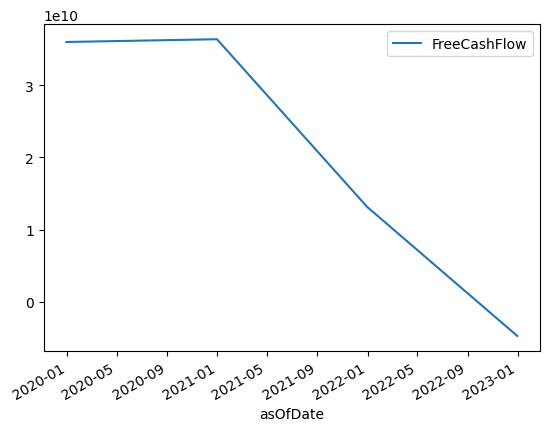

In [16]:
free_cash_flow.plot();

## Balance sheet analysis

In [17]:
balance_sheet = ticker.balance_sheet(frequency='Quarterly')

In [18]:
type(balance_sheet)

pandas.core.frame.DataFrame

In [19]:
balance_sheet.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AccountsPayable',
       'AccountsReceivable', 'AccumulatedDepreciation',
       'AssetsHeldForSaleCurrent', 'BuildingsAndImprovements',
       'CapitalLeaseObligations', 'CapitalStock', 'CashAndCashEquivalents',
       'CashCashEquivalentsAndShortTermInvestments', 'CommonStock',
       'CommonStockEquity', 'ConstructionInProgress', 'CurrentAssets',
       'CurrentCapitalLeaseObligation', 'CurrentDebt',
       'CurrentDebtAndCapitalLeaseObligation', 'CurrentLiabilities',
       'DerivativeProductLiabilities', 'DividendsPayable', 'FinancialAssets',
       'FinancialAssetsDesignatedasFairValueThroughProfitorLossTotal',
       'FinishedGoods', 'Goodwill', 'GoodwillAndOtherIntangibleAssets',
       'GrossPPE', 'HedgingAssetsCurrent', 'Inventory', 'InvestedCapital',
       'InvestmentProperties', 'InvestmentinFinancialAssets',
       'InvestmentsinAssociatesatCost', 'InvestmentsinJointVenturesatCost',
       'LandAndImprovements', 'LongTermC

### Debt vs Equity

In [20]:
debt_vs_equity = balance_sheet[['asOfDate', 'TotalDebt', 'CommonStockEquity']]
debt_vs_equity = debt_vs_equity.set_index('asOfDate')

In [21]:
debt_vs_equity.style.format({
    'TotalDebt': '{:,.2f}'.format,    
    'CommonStockEquity': '{:,.2f}'.format,
})

,TotalDebt,CommonStockEquity
asOfDate,,
2022-06-30 00:00:00,"188,180,245,000.00","122,551,900,000.00"
2022-12-31 00:00:00,"176,288,649,000.00","121,795,156,000.00"


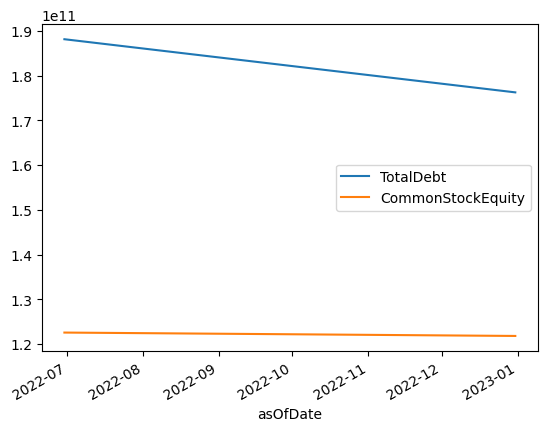

In [22]:
debt_vs_equity.plot();

### Debt/Equity ratio

In [23]:
balance_sheet['TotalDebt/CommonStockEquity']=balance_sheet['TotalDebt']/balance_sheet['CommonStockEquity']

debt_equity_ratio = balance_sheet[['asOfDate', 'TotalDebt/CommonStockEquity']]
debt_equity_ratio = debt_equity_ratio.set_index('asOfDate')

In [24]:
debt_equity_ratio.style.format({
    'TotalDebt/CommonStockEquity': '{:,.2%}'.format
})

,TotalDebt/CommonStockEquity
asOfDate,
2022-06-30 00:00:00,153.55%
2022-12-31 00:00:00,144.74%


In [25]:
debt_equity_ratio.index

DatetimeIndex(['2022-06-30', '2022-12-31'], dtype='datetime64[ns]', name='asOfDate', freq=None)

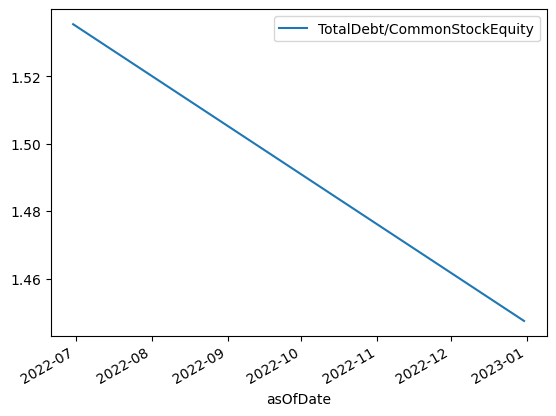

In [26]:
debt_equity_ratio.plot();